In [433]:
# imports
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import tarfile
from six.moves import urllib
from numpy.random import default_rng
import pandas as pd
import datetime


random = default_rng(42)

# jolies figures directement dans le notebook
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


def read_data (filePath) :
    return pd.read_csv(filePath)

In [434]:
general_data = read_data("./data/general_data.csv")
employee_survey = read_data("./data/employee_survey_data.csv")
manager_survey_data = read_data("./data/manager_survey_data.csv")

in_time_data = read_data("./data/in_time.csv")
out_time_data = read_data("./data/out_time.csv")

In [442]:
def get_nan_columns_all (dataframe) :
    return  dataframe.columns[dataframe.isnull().all(0)].tolist()
 

def get_nan_columns(dataframe):
    return dataframe.columns[dataframe.isna().any()].tolist()


def replace_nan_date(dataframe, columns):
    for column in columns:
        dataframe[column].fillna(0, inplace=True)
    return dataframe

# general_data.value_counts()

def value_count(dataframe, column):
    return dataframe[column].value_counts(dropna=False)


In [436]:
general_data.head()
# general_data.info()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [437]:
employee_survey.head()
# employee_survey.info()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [438]:
manager_survey_data.head()
# manager_survey_data.info()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [439]:


in_time_data.drop(get_nan_columns_all(in_time_data), axis=1, inplace=True)
in_time_data.head()
# in_time_data.info()


,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,NaN,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [440]:
out_time_data.drop(get_nan_columns_all(out_time_data), axis=1, inplace=True)
out_time_data.head()
# out_time_data.info()

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,...,NaN,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [340]:
# general_data.hist(bins=50, figsize=(30, 30))


In [341]:
# employee_survey.hist(bins=50, figsize=(20, 15))

In [342]:
# manager_survey_data.hist(bins=50, figsize=(20, 15))

In [343]:
# in_time_data.hist(bins=50, figsize=(20, 15))

In [344]:
# out_time_data.hist(bins=50, figsize=(20, 15))

In [346]:
# general_data.describe()
# employee_survey.describe()
# manager_survey_data.describe()

In [443]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder()

general_data_copy = general_data.copy()

general_data_copy.drop(
    ["Over18", "EmployeeCount", "StandardHours"], axis=1, inplace=True)


In [444]:
general_data_copy.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [445]:
general_data_copy[general_data_copy.isnull().any(axis=1)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,24,Male,1,...,Married,89260,1.0,14,0,NaN,4,20,11,6
115,27,No,Travel_Rarely,Sales,2,3,Life Sciences,116,Male,1,...,Divorced,23670,NaN,12,1,5.0,2,5,0,4
137,43,No,Travel_Frequently,Sales,14,3,Life Sciences,138,Female,1,...,Married,37480,7.0,14,2,NaN,3,3,1,2
210,52,No,Travel_Rarely,Sales,2,1,Medical,211,Male,1,...,Divorced,99800,NaN,11,1,18.0,2,10,6,9
308,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,309,Male,1,...,Single,27740,4.0,13,1,NaN,2,5,1,3
343,40,No,Travel_Frequently,Sales,9,3,Marketing,344,Male,3,...,Single,22380,NaN,14,0,10.0,3,1,0,0
476,22,No,Travel_Rarely,Research & Development,8,3,Other,477,Male,2,...,Married,49070,NaN,21,1,4.0,2,4,1,1
574,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,575,Male,3,...,Divorced,166590,7.0,16,1,NaN,2,6,1,3
647,29,No,Travel_Rarely,Research & Development,3,3,Technical Degree,648,Female,2,...,Divorced,48050,NaN,16,1,9.0,2,7,1,7
799,29,Yes,Travel_Frequently,Research & Development,28,3,Medical,800,Female,5,...,Single,44340,NaN,17,3,7.0,1,5,0,0


In [446]:
median1 = general_data_copy["NumCompaniesWorked"].median()
median2 = general_data_copy["TotalWorkingYears"].median()

print(median1)
print(median2)

general_data_copy["NumCompaniesWorked"].fillna(median1 , inplace=True)
general_data_copy['TotalWorkingYears'].fillna(median2, inplace=True)

# general_data_copy.head()
general_data_copy[general_data_copy.isnull().any(axis=1)]

2.0
10.0


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager


In [447]:
#find duplicate data in datasets 
general_data_copy.duplicated().sum()

0

In [448]:
#create index with EmployeeID
general_data_copy.index = general_data_copy["EmployeeID"]
general_data_copy.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,Married,131160,1.0,11,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,Single,41890,0.0,23,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,Married,193280,1.0,15,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,Married,83210,3.0,11,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,Single,23420,4.0,12,2,9.0,2,6,0,4


In [449]:
general_data_copy_encoded = ordinal_encoder.fit_transform(general_data_copy[["Attrition"]])
general_data_copy_encoded[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [450]:
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [451]:
# Convert categorical variable into dummy/indicator variables.
general_data_dum = pd.get_dummies(general_data_copy[[
                                  "BusinessTravel", "Department", "JobRole", "MaritalStatus", "EducationField", "Gender"]])  # add gender here
general_data_dum.head()


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,...,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
5,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeID'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>],
       [<AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

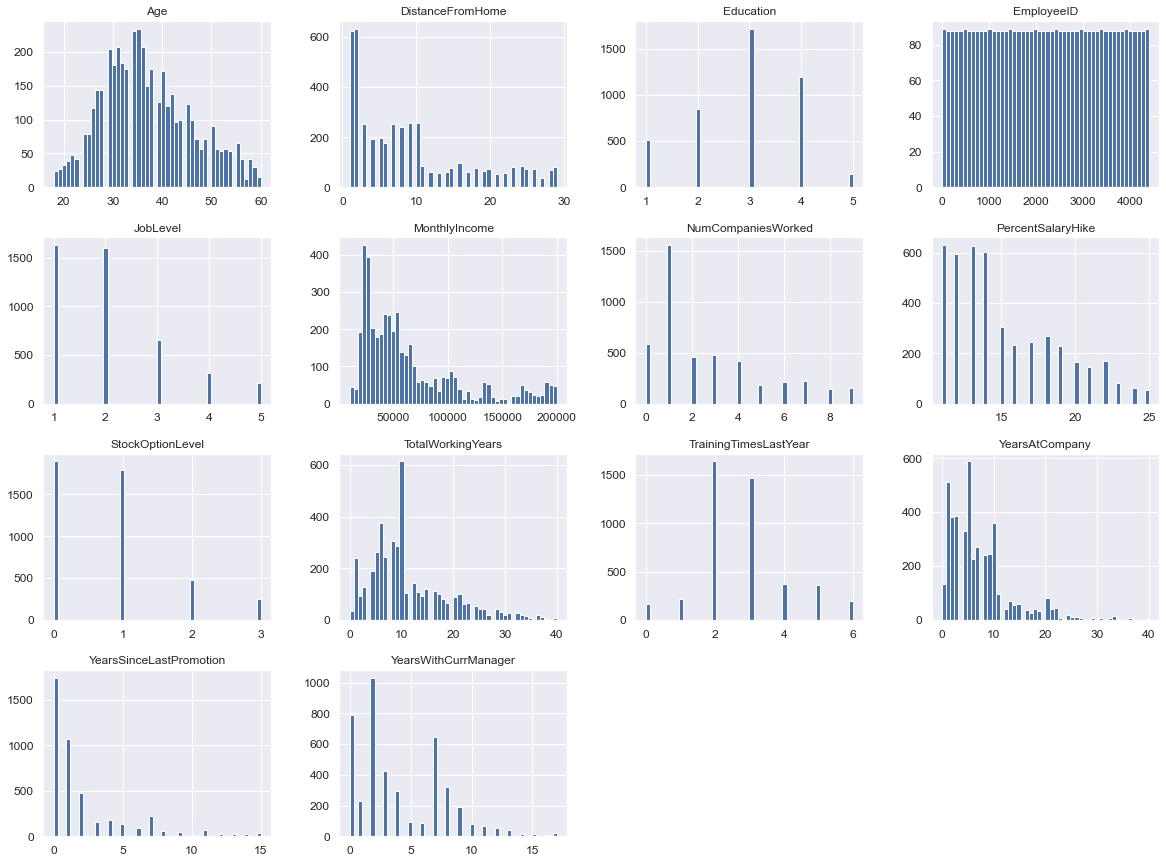

In [452]:
general_data_copy.hist(bins=50, figsize=(20, 15))


In [453]:
# employee_survey.isna().sum()
# manager_survey_data.isna().sum()
# in_time_data.isna().sum()
# out_time_data.isna().sum()

employee_survey_copy = employee_survey.copy()
manager_survey_data_copy = manager_survey_data.copy()
in_time_data_copy = in_time_data.copy()
out_time_data_copy = out_time_data.copy()

In [454]:
employee_survey_copy.isna().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [455]:
manager_survey_data_copy.isna().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [456]:
in_time_data_copy.isna().sum()

Unnamed: 0      0
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
             ... 
2015-12-24    250
2015-12-28    234
2015-12-29    230
2015-12-30    265
2015-12-31    213
Length: 250, dtype: int64

In [457]:
out_time_data_copy.isna().sum()

Unnamed: 0      0
2015-01-02    209
2015-01-05    206
2015-01-06    228
2015-01-07    209
             ... 
2015-12-24    250
2015-12-28    234
2015-12-29    230
2015-12-30    265
2015-12-31    213
Length: 250, dtype: int64

In [458]:
employee_survey_copy[employee_survey_copy.isnull().any(axis=1)]

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
11,12,NaN,4.0,3.0
40,41,3.0,NaN,3.0
84,85,3.0,4.0,NaN
111,112,NaN,2.0,3.0
124,125,3.0,NaN,3.0
...,...,...,...,...
4219,4220,2.0,NaN,3.0
4305,4306,2.0,2.0,NaN
4332,4333,NaN,4.0,3.0
4345,4346,4.0,NaN,4.0


In [459]:
#replace missing values 
employee_survey_copy["EnvironmentSatisfaction"].fillna(0, inplace=True)
employee_survey_copy["JobSatisfaction"].fillna(0, inplace=True)
employee_survey_copy["WorkLifeBalance"].fillna(employee_survey_copy["WorkLifeBalance"].median(), inplace=True)

employee_survey_copy[employee_survey_copy.isnull().any(axis=1)]


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance


In [460]:
employee_survey_copy.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'WorkLifeBalance'}>]], dtype=object)

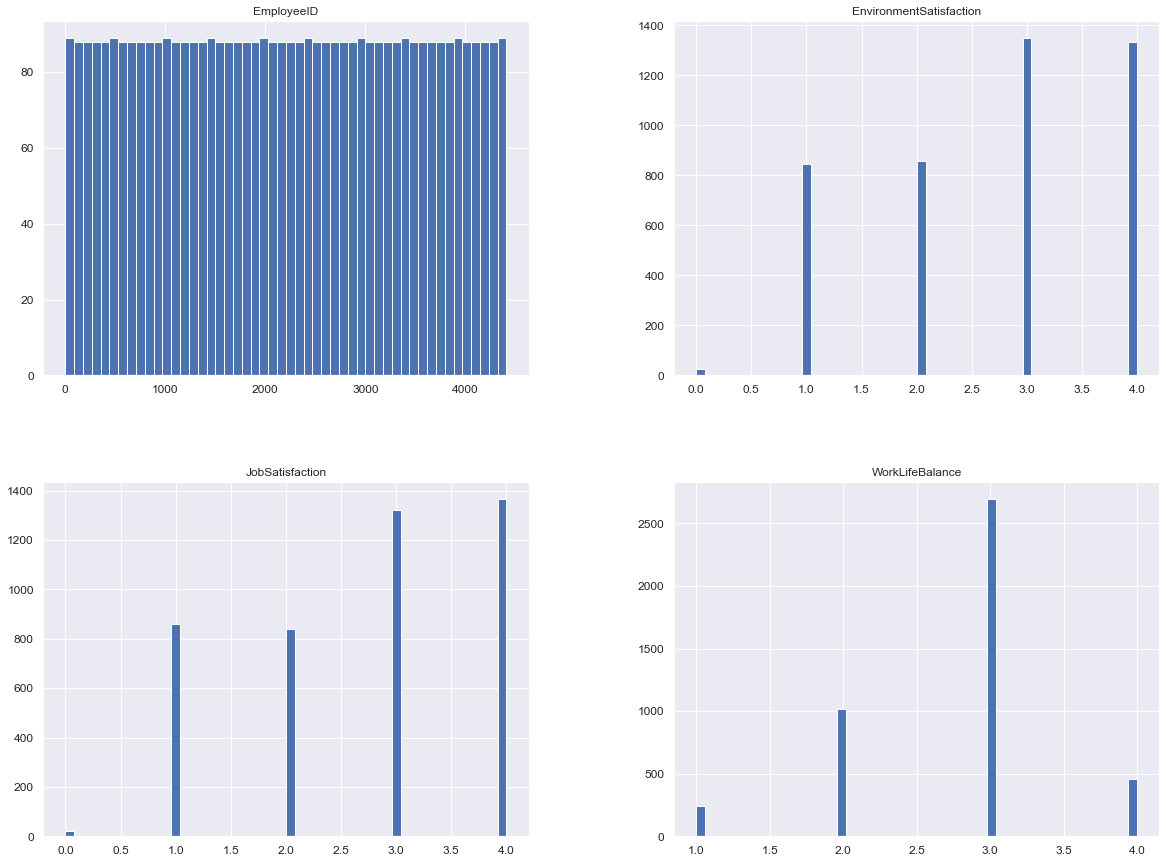

In [461]:
employee_survey_copy.hist(bins=50, figsize=(20, 15))

In [462]:
manager_survey_data_copy[manager_survey_data_copy.isnull().any(axis=1)]

,EmployeeID,JobInvolvement,PerformanceRating


array([[<AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:>]], dtype=object)

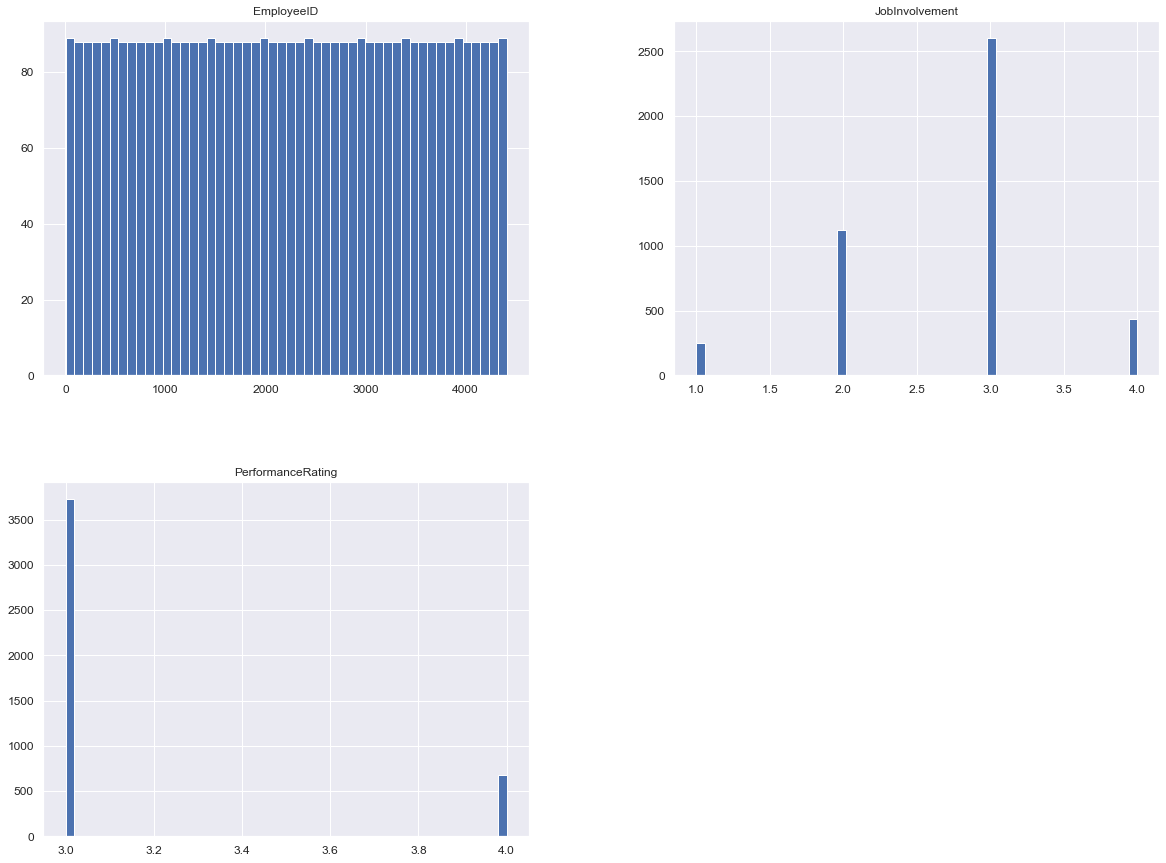

In [463]:
manager_survey_data_copy.hist(bins=50, figsize=(20, 15))

In [464]:
# intime_data_droped = in_time_data_copy.dropna(axis=1, how='all')
in_time_data_copy[in_time_data_copy.isnull().any(axis=1)]
# in_time_data_copy

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,NaN,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,2015-01-15 09:29:17,...,2015-12-17 10:05:22,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,2015-01-15 10:18:11,...,2015-12-17 09:45:49,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,2015-01-15 10:08:31,...,2015-12-17 10:01:36,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,2015-01-15 09:04:17,...,2015-12-17 09:51:40,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [465]:
out_time_data_copy[out_time_data_copy.isnull().any(axis=1)]

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,...,NaN,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,2015-01-15 17:50:37,...,2015-12-17 18:35:39,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,2015-01-15 16:19:00,...,2015-12-17 15:44:50,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,2015-01-15 18:15:53,...,2015-12-17 17:42:43,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,2015-01-15 18:33:21,...,2015-12-17 19:06:58,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [466]:
# drop days off work
# in_time_data_copy.dropna(axis=1, how='all')

for i in in_time_data_copy : 
    in_time_data_copy[i].fillna(0 , inplace=True)
    
in_time_data_copy.head() 
# in_time_data_copy_drop.head()

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,0,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [467]:
# drop days off work
 
out_time_data_copy.dropna(axis=1, how='all')
for i in out_time_data_copy : 
    out_time_data_copy[i].fillna(0 , inplace=True)
    
out_time_data_copy.head() 

# out_time_data_copy_drop.head()

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,...,0,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [468]:
in_time_data_copy.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
in_time_data_copy.index = in_time_data_copy["EmployeeID"]
in_time_data_copy.head()

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,0,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,2,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [469]:
out_time_data_copy.rename(columns={"Unnamed: 0": "EmployeeID"}, inplace=True)
out_time_data_copy.index = out_time_data_copy["EmployeeID"]
out_time_data_copy.head()

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,...,0,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,2,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,3,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,5,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [470]:

clean_in_time_data = replace_nan_date(
    in_time_data_copy, get_nan_columns(in_time_data_copy))
clean_in_time_data.head()

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,0,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,2,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,4,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,2015-01-15 10:00:50,...,2015-12-17 09:54:36,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,5,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,2015-01-15 10:06:12,...,2015-12-17 09:46:35,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [471]:
clean_out_time_data = replace_nan_date(
    out_time_data_copy, get_nan_columns(out_time_data_copy))
clean_out_time_data.head()

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,1,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,2015-01-15 17:22:13,...,0,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,2,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,2015-01-15 17:14:44,...,2015-12-17 17:10:50,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,3,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,2015-01-15 17:21:29,...,2015-12-17 17:06:23,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,4,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,2015-01-15 16:53:26,...,2015-12-17 17:21:57,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,5,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,2015-01-15 18:21:48,...,2015-12-17 18:05:47,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [472]:
clean_in_time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 250 entries, EmployeeID to 2015-12-31
dtypes: int64(1), object(249)
memory usage: 8.4+ MB


In [473]:
clean_out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 250 entries, EmployeeID to 2015-12-31
dtypes: int64(1), object(249)
memory usage: 8.4+ MB


In [474]:
#convert object type of dataframe to datetime
# clean_in_time_data.apply(pd.to_datetime , errors='coerce')
in_time_data_formated = clean_in_time_data.apply(pd.to_datetime, errors='coerce')
in_time_data_formated.dtypes

EmployeeID    datetime64[ns]
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
2015-01-07    datetime64[ns]
                   ...      
2015-12-24    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 250, dtype: object

In [475]:
#convert object type of dataframe to datetime
out_time_data_formated = clean_out_time_data.apply(pd.to_datetime, errors='coerce')
out_time_data_formated.dtypes

EmployeeID    datetime64[ns]
2015-01-02    datetime64[ns]
2015-01-05    datetime64[ns]
2015-01-06    datetime64[ns]
2015-01-07    datetime64[ns]
                   ...      
2015-12-24    datetime64[ns]
2015-12-28    datetime64[ns]
2015-12-29    datetime64[ns]
2015-12-30    datetime64[ns]
2015-12-31    datetime64[ns]
Length: 250, dtype: object

In [476]:
# calculate time difference between in and out time in hours
worktime_data = out_time_data_formated - in_time_data_formated
worktime_data

,EmployeeID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
4,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
5,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,0 days,0 days 08:07:05,0 days 08:50:27,0 days 08:23:58,0 days 08:50:42,0 days 08:13:25,0 days 08:16:51,0 days 08:21:38,0 days 08:45:33,0 days 08:21:20,...,0 days 08:30:17,0 days 08:04:59,0 days 08:09:41,0 days 08:17:33,0 days 08:36:16,0 days 08:35:49,0 days 08:28:56,0 days 09:04:29,0 days 08:56:37,0 days 08:30:29
4407,0 days,0 days 06:15:20,0 days 00:00:00,0 days 05:23:37,0 days 05:43:40,0 days 06:11:36,0 days 05:42:52,0 days 06:03:10,0 days 06:17:32,0 days 06:00:49,...,0 days 05:59:01,0 days 05:55:30,0 days 05:49:50,0 days 05:55:29,0 days 06:06:38,0 days 05:59:34,0 days 05:40:11,0 days 06:33:30,0 days 05:42:08,0 days 06:08:51
4408,0 days,0 days 07:16:34,0 days 07:35:07,0 days 07:38:29,0 days 07:59:10,0 days 07:17:47,0 days 07:01:54,0 days 07:46:33,0 days 07:28:42,0 days 08:07:22,...,0 days 07:41:07,0 days 07:47:08,0 days 07:51:58,0 days 07:45:13,0 days 07:45:08,0 days 07:24:07,0 days 07:44:04,0 days 00:00:00,0 days 07:45:38,0 days 08:05:25


In [477]:
# work time done by employee
# worktime_done = worktime_sum - \
#     np.timedelta64(datetime.timedelta(seconds=8*3600*249), 'h')

worktime_done = worktime_data.mean(axis=1).dt.total_seconds()/3600
# worktime_done = worktime_data.
# worktime_done
worktime_done_dataframe = pd.DataFrame(worktime_done)
worktime_done_dataframe.rename(columns={0: "WorkTimeDone"}, inplace=True)

worktime_done_dataframe # heures suplémentaires , abscance de travail


,WorkTimeDone
EmployeeID,
1,6.842748
2,7.286707
3,6.788817
4,6.762058
5,7.846051
...,...
4406,8.283653
4407,5.873608
4408,7.120928


In [478]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

worktime_employee_survey = pd.merge(worktime_done_dataframe, employee_survey_copy,
                                    how='inner', on='EmployeeID')

worktime_employee_manager_survey = pd.merge(worktime_employee_survey, manager_survey_data_copy,
                                            how='inner', on='EmployeeID')


# convert general_data_copy_encoded to dataframe
cat_general_data_copy_encoded = pd.DataFrame(
    general_data_copy_encoded, columns=['Attrition'])

cat_general_data_copy_encoded.index += 1

cat_general_data_copy_encoded = cat_general_data_copy_encoded.astype("int64")

cat_general_data_copy_encoded["EmployeeID"] = cat_general_data_copy_encoded.index
cat_general_data_copy_encoded.index = cat_general_data_copy_encoded["EmployeeID"]


general_data_all_ = pd.merge(
    general_data_dum, cat_general_data_copy_encoded, how="inner", left_index=True, right_index=True)


# print(scaler.fit_transform(general_data_all_))

# general_data_all_
# general_data_all_.hist(bins=50, figsize=(40, 30))
general_data_all_.corr()


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,...,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,Attrition,EmployeeID
BusinessTravel_Non-Travel,1.000000,-0.162435,-0.526850,-0.038044,0.056393,-0.041601,-0.010785,0.008442,-0.020224,-0.012454,...,-0.029375,0.023573,-0.052275,0.012828,0.015987,-0.003690,-4.128614e-02,4.128614e-02,-0.074457,0.004087
BusinessTravel_Travel_Frequently,-0.162435,1.000000,-0.753092,-0.033251,-0.029566,0.045247,-0.004183,0.011313,-0.031070,-0.008354,...,-0.052957,-0.036018,0.033823,0.050775,0.011736,-0.041823,-2.840693e-03,2.840693e-03,0.115143,-0.001921
BusinessTravel_Travel_Rarely,-0.526850,-0.753092,1.000000,0.054009,-0.012133,-0.011237,0.010794,-0.015374,0.040249,0.015500,...,0.065204,0.015308,0.005721,-0.052291,-0.020769,0.038487,2.997536e-02,-2.997536e-02,-0.049538,-0.001071
Department_Human Resources,-0.038044,-0.033251,0.054009,1.000000,-0.290754,-0.139650,-0.030820,-0.022339,0.016751,-0.018127,...,0.646436,-0.068040,-0.073692,-0.049761,-0.007527,-0.019469,-8.227318e-03,8.227318e-03,0.080768,0.021296
Department_Research & Development,0.056393,-0.029566,-0.012133,-0.290754,1.000000,-0.906818,0.006824,0.015523,-0.019962,0.013045,...,-0.187954,0.127321,-0.478520,0.183548,0.064751,0.038541,1.050694e-02,-1.050694e-02,-0.015307,-0.014299
Department_Sales,-0.041601,0.045247,-0.011237,-0.139650,-0.906818,1.000000,0.006515,-0.006223,0.013280,-0.005514,...,-0.090275,-0.101791,0.527691,-0.168034,-0.063695,-0.031309,-7.249169e-03,7.249169e-03,-0.019742,0.005417
JobRole_Healthcare Representative,-0.010785,-0.004183,0.010794,-0.030820,0.006824,0.006515,1.000000,-0.059898,-0.144652,-0.085409,...,-0.025003,0.019383,-0.032053,-0.012071,0.007205,0.027032,2.924285e-03,-2.924285e-03,-0.013768,0.002764
JobRole_Human Resources,0.008442,0.011313,-0.015374,-0.022339,0.015523,-0.006223,-0.059898,1.000000,-0.088561,-0.052290,...,-0.026195,-0.003267,0.016310,-0.003277,0.017640,-0.008623,-6.013739e-03,6.013739e-03,-0.013857,-0.008991
JobRole_Laboratory Technician,-0.020224,-0.031070,0.040249,0.016751,-0.019962,0.013280,-0.144652,-0.088561,1.000000,-0.126280,...,0.029825,-0.013681,0.028663,0.000951,-0.019043,-0.007852,-1.312124e-02,1.312124e-02,0.001179,-0.008073
JobRole_Manager,-0.012454,-0.008354,0.015500,-0.018127,0.013045,-0.005514,-0.085409,-0.052290,-0.126280,1.000000,...,0.022460,0.021488,-0.026139,-0.012648,0.015283,-0.010855,4.480898e-02,-4.480898e-02,-0.017798,-0.001464


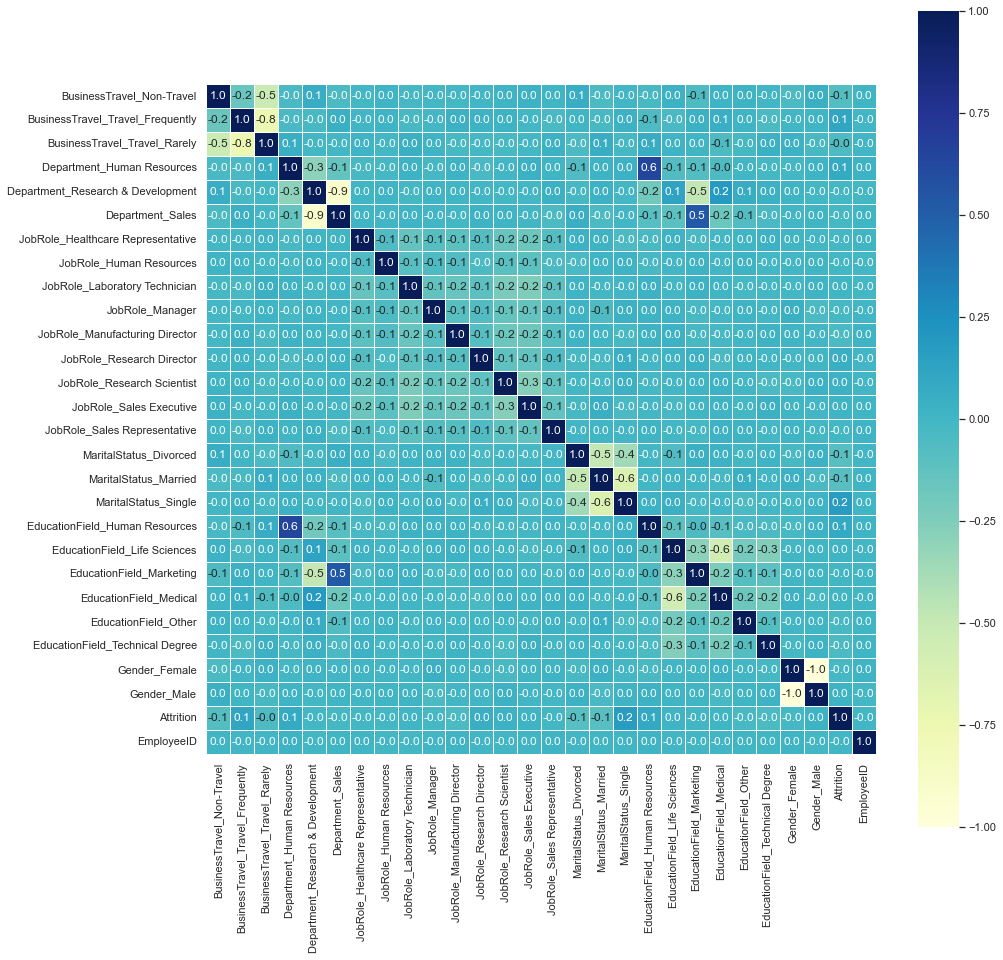

In [484]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(15, 15))
ax = sns.heatmap(general_data_all_.corr(),
                 annot=True, cmap="YlGnBu", fmt='.1f', square=1, linewidth=1.)


In [494]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, Y_train, Y_test = train_test_split(
    general_data_all_.drop(columns=['Attrition']), general_data_all_['Attrition'], test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [507]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# x, y = make_classification(n_samples=1000, n_features=10,
#                            n_informative=5, n_redundant=0, random_state=0, shuffle=False)



clf_random_forest = RandomForestClassifier(max_depth=2, random_state=0)

clf_random_forest.fit(X_train, Y_train)

some_data_rf = X_train.iloc[0:100]

some_labels_rf = Y_train.iloc[0:100]

prediction_data_rf = clf_random_forest.predict(some_data_rf)

print("labels", some_labels_rf)
print("prediction data", prediction_data_rf)


labels EmployeeID
2589    0
2355    0
656     1
4340    0
3558    0
       ..
2300    0
2440    0
1407    0
737     0
1558    0
Name: Attrition, Length: 100, dtype: int64
prediction data [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [506]:
from sklearn import tree


clf_decision_tree = tree.DecisionTreeClassifier()
clf_decision_tree.fit(X_train, Y_train)

somme_data_dt = X_train.iloc[0:100]

somme_labels_dt = Y_train.iloc[0:100]

prediction_data_dt = clf_decision_tree.predict(somme_data_dt)

print("labels", somme_labels_dt)
print("prediction data", prediction_data_dt)


labels EmployeeID
2589    0
2355    0
656     1
4340    0
3558    0
       ..
2300    0
2440    0
1407    0
737     0
1558    0
Name: Attrition, Length: 100, dtype: int64
prediction data [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [505]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

clf_logistic_regression = LogisticRegression(
    random_state=0, solver='lbfgs', multi_class='multinomial')
clf_logistic_regression.fit(X_train, Y_train)

somme_data_lr = X_train.iloc[:100]

somme_labels_lr = Y_train.iloc[:100]

clf_logistic_regression.predict(somme_data_lr)

print("labels", somme_labels_lr)
print('prediction data', somme_data_lr)


labels EmployeeID
2589    0
2355    0
656     1
4340    0
3558    0
       ..
2300    0
2440    0
1407    0
737     0
1558    0
Name: Attrition, Length: 100, dtype: int64
prediction data             BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
EmployeeID                                                                
2589                                0                                 0   
2355                                0                                 0   
656                                 0                                 0   
4340                                0                                 0   
3558                                0                                 0   
...                               ...                               ...   
2300                                0                                 0   
2440                                0                                 0   
1407                                1                          

In [503]:
from sklearn.model_selection import cross_val_score

#clf_logistic_regression , clf_decision_tree ,clf_random_forest
cross_val_score_lr = cross_val_score(clf_logistic_regression, X_train,
                                     Y_train, cv=3, scoring="accuracy")
cross_val_score_dt = cross_val_score(clf_decision_tree, X_train,
                                     Y_train, cv=3, scoring="accuracy")
cross_val_score_rf = cross_val_score(clf_random_forest, X_train,
                                     Y_train, cv=3, scoring="accuracy")

print("cross_val_score_lr", cross_val_score_lr)
print("cross_val_score_dt", cross_val_score_dt)
print("cross_val_score_rf", cross_val_score_rf)


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

cross_val_score_lr [0.83928571 0.83758503 0.83673469]
cross_val_score_dt [0.76530612 0.7755102  0.78061224]
cross_val_score_rf [0.83843537 0.83843537 0.83843537]


In [511]:
from sklearn.pipeline import make_pipeline


def pipeMaker(model):
    return make_pipeline(StandardScaler(), model)


print(
    pipeMaker(LogisticRegression()).fit(
        X_train_scaled, Y_train).score(X_test, Y_test),
    pipeMaker(RandomForestClassifier()).fit(
        X_train_scaled, Y_train).score(X_test, Y_test),
    pipeMaker(tree.DecisionTreeClassifier()).fit(
        X_train_scaled, Y_train).score(X_test, Y_test)
)


C:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.8401360544217688 0.8061224489795918 0.7721088435374149


C:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [493]:
# from sklearn.base import BaseEstimator

# class Never5Classifier(BaseEstimator):
#     def fit(self, X, y=None):
#         pass
#     def predict(self, X):
#         return np.zeros((len(X), 1), dtype=bool)

In [492]:
# never_5_clf = Never5Classifier()
# cross_val_score(never_5_clf, X_train, Y_train, cv=3, scoring="accuracy")

In [491]:
# from sklearn.metrics import mean_squared_error

# logistic_regression_mse = mean_squared_error(
#     somme_labels_lr,
#     clf_logistic_regression.predict(somme_data_lr))
# logistic_regression_rmse = np.sqrt(logistic_regression_mse)

# decision_tree_mse = mean_squared_error(
#     somme_labels_dt,
#     clf_decision_tree.predict(somme_data_dt))
# decision_tree_rmse = np.sqrt(decision_tree_mse)

# random_forest_mse = mean_squared_error(
#     some_labels_rf, clf_random_forest.predict(some_data_rf))
# random_forest_rmse = np.sqrt(random_forest_mse)

# print("logistic regression rmse", logistic_regression_rmse)
# print("decision tree rmse", decision_tree_rmse)
# print("random forest rmse", random_forest_rmse)


In [490]:
# from sklearn.metrics import mean_absolute_error

# ae_logistic_regression = mean_absolute_error(
#     clf_logistic_regression.predict(somme_data_lr), somme_labels_lr)

# ae_decision_tree_regression = mean_absolute_error(
#     clf_decision_tree.predict(somme_data_dt), somme_labels_dt)

# ae_random_forest = mean_absolute_error(
#     clf_random_forest.predict(some_data_rf), some_labels_rf)

# print("logistic regression ae", ae_logistic_regression)
# print("decision tree ae", ae_decision_tree_regression)
# print("random forest ae", ae_random_forest)
